In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import (
    RANSACRegressor, HuberRegressor, TheilSenRegressor
)
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_squared_error
from sklearn.metrics  import mean_absolute_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
! pip install pandas_visual_analysis
from pandas_visual_analysis import VisualAnalysis

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
/kaggle/input/air-pollution/wp_remove_null_2014.csv


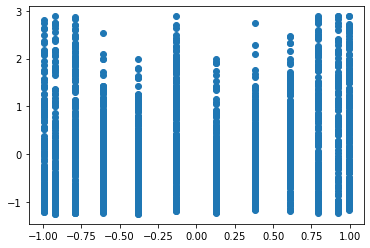

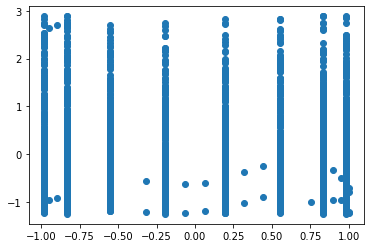

    x0  cos_monthly  cos_hourly  temperature_f  wind_speed_mph  \
0  1.0     0.991445    0.980785      -0.927462       -0.102394   
1  1.0     0.991445    0.831470      -0.940403       -0.068451   
2  1.0     0.991445    0.555570      -0.894869        1.302873   
3  1.0     0.991445    0.195090      -0.476918        2.318920   
4  1.0     0.991445   -0.195090      -0.328813        2.085840   

   wind_bearing_deg  relative_humidity  visibility_miles_max_10  pressure_mb  \
0          0.978743          -1.258159                -0.102066    -0.326820   
1          0.942839          -1.258159                -0.172858    -0.407473   
2          1.059528          -1.172799                -0.388959    -0.199369   
3          1.032600          -1.130119                 0.479173    -0.073909   
4          1.122360          -1.556920                 1.444179    -0.225258   

      Value  
0 -0.120023  
1  0.481530  
2 -0.738287  
3 -0.905385  
4 -0.888675  


In [2]:
def transform_unit(unit, divisor):
    def transform(unit):
        return (2 * math.pi * (unit - .5) / divisor)
    return math.sin(transform(unit)), math.cos(transform(unit))


#     @staticmethod
# def trans(param, divisor, f):
#     to_both = np.vectorize(lambda x: f(x, divisor))
#     return to_both(param)

def get_and_prep_circular_data2(param, divisor, f):
    
    deg_col = np.array(data_df[param])        
    to_both = np.vectorize(lambda x: f(x, divisor))
    return to_both(deg_col)

def feature_scaler(col):
    avg = np.mean(col)
    std = np.std(col)
    # for each x, subtract by the column mean and divide by the standard dev
    scale = np.vectorize(lambda x: (x - avg) / std)
    return scale(col)

data_df = pd.read_csv('/kaggle/input/air-pollution/wp_remove_null_2014.csv')
data_df.insert(0,'x0',([1.0] * len(data_df)))
data_df = data_df[data_df['Value']<=250]

sin_month, cos_month = get_and_prep_circular_data2('Month', 24, transform_unit)
# sin_combined = (2*sin_month+3*cos_month)/5
sin_hour, cos_hour = get_and_prep_circular_data2('Hour', 48, transform_unit)

data_df['visibility_miles_max_10'] = feature_scaler(np.array(data_df['visibility_miles_max_10']))
data_df['temperature_f'] = feature_scaler(np.array(data_df['temperature_f']))
data_df['wind_speed_mph'] = feature_scaler(np.array(data_df['wind_speed_mph']))
data_df['relative_humidity'] = feature_scaler(np.array(data_df['relative_humidity']))
data_df['pressure_mb'] = feature_scaler(np.array(data_df['pressure_mb']))
data_df['Value'] = feature_scaler(np.array(data_df['Value']))
data_df['wind_bearing_deg'] = feature_scaler(np.array(data_df['wind_bearing_deg']))

# data_df.insert(1, 'sin_monthly', sin_month)
data_df.insert(1, 'cos_monthly', cos_month)
# data_df.insert(3, 'sin_combined', sin_combined)
# data_df.insert(3, 'sin_hourly', sin_hour)
data_df.insert(2, 'cos_hourly', cos_hour)
data_df = data_df.drop(['Month'], axis =1)
data_df = data_df.drop(['Hour'], axis =1)
data_df = data_df.drop(['Day'], axis =1)
data_df = data_df.drop(['Year'], axis =1)

plt.scatter(data_df['cos_monthly'], data_df['Value'])
plt.show()
plt.scatter(data_df['cos_hourly'], data_df['Value'])
plt.show()

print(data_df.head())

VisualAnalysis(data_df)

In [3]:
X = data_df.drop(['Value'], axis=1)
# X = data_df.drop(['Year', 'Month', 'Day', 'Hour', 'temperature_f', 'wind_speed_mph', 'wind_bearing_deg', 'relative_humidity', 'pressure_mb', 'Value'], axis=1)

y = data_df['Value']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
estimadores = {
#     'TheilSenRegressor' : TheilSenRegressor(),
    'LR' : LinearRegression(),
    'SVR' : SVR(gamma= 'auto', C=1.0, epsilon=0.1),
    'RANSAC' : RANSACRegressor(),
    'HUBER' : HuberRegressor(epsilon=1.95),
    
}


(2675, 9) (2675,)
(1872, 9) (1872,)


LR
MSE:  0.42122265963201666
Score:  0.5918825229272866


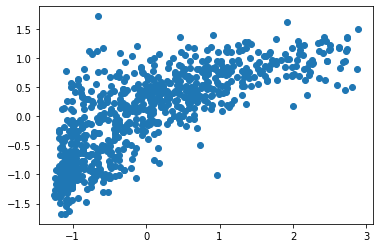

SVR
MSE:  0.3215449251450323
Score:  0.6884590593241898


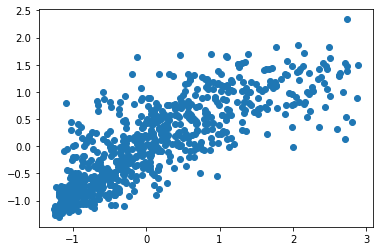

RANSAC
MSE:  0.4321528907050126
Score:  0.5812923558806469


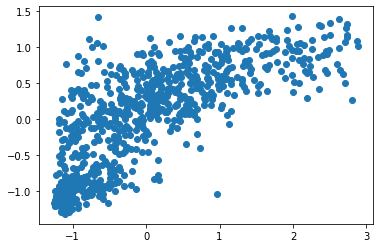

HUBER
MSE:  0.4230172308746358
Score:  0.590143784824724


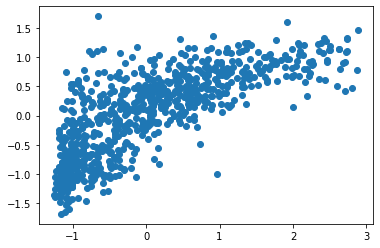

In [4]:
for name, estimador in estimadores.items():
    X_train = np.array(X_train)
    X_train.reshape(-1, 1)
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    print("="*64)
    print(name)
    print("MSE: ", mean_squared_error(y_test, predictions))
    print("Score: ", estimador.score(X_test, y_test))
    plt.scatter(y_test,predictions)
#     plt.xlim(0,250)
#     plt.ylim(0,250)
    plt.show()

                         x0  cos_monthly  cos_hourly  temperature_f  \
x0                      NaN          NaN         NaN            NaN   
cos_monthly             NaN     1.000000   -0.006013      -0.122278   
cos_hourly              NaN    -0.006013    1.000000      -0.154898   
temperature_f           NaN    -0.122278   -0.154898       1.000000   
wind_speed_mph          NaN    -0.003502   -0.167748      -0.018305   
wind_bearing_deg        NaN    -0.035342    0.020127      -0.187021   
relative_humidity       NaN    -0.221429    0.257434       0.109168   
visibility_miles_max_10 NaN    -0.025726   -0.121061       0.073459   
pressure_mb             NaN     0.008825    0.048220      -0.857630   
Value                   NaN     0.127112    0.008456      -0.075653   

                         wind_speed_mph  wind_bearing_deg  relative_humidity  \
x0                                  NaN               NaN                NaN   
cos_monthly                   -0.003502         -0.035342 

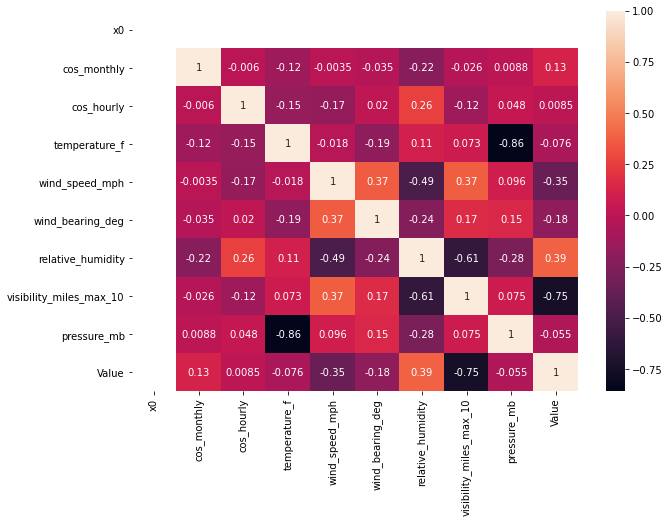

In [5]:
corrMatrix = data_df.corr()
print(corrMatrix)
plt.figure(figsize=(10, 7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# d1 = data_df[['Day', 'Value']]
# plt.figure(figsize=(10, 7))
# sns.heatmap(d1, annot=True)
# plt.show()


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# X = data_df.drop(['Value'], axis=1)
# X = data_df[['cos_monthly', 'cos_hourly','wind_speed_mph', 'visibility_miles_max_10']]
X = data_df.drop(['Value'], axis=1)
y = data_df['Value']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(mean_squared_error(y_test, pred))

print(knn.score(X_test,y_test))

plt.scatter(pred, y_test)

ValueError: Unknown label type: 'continuous'

In [7]:
from sklearn.ensemble import RandomForestClassifier

X = data_df.drop(['Value'], axis=1)
# X = data_df[['cos_monthly', 'cos_hourly','wind_speed_mph', 'wind_bearing_deg', 'visibility_miles_max_10']]
y = data_df['Value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=1)
model.fit(X_train,y_train)
pred = model.predict(X_test)

print(mean_squared_error(y_test, pred))
print(model.score(X_test,y_test))
plt.scatter(pred, y_test)

ValueError: Unknown label type: 'continuous'

0.6136267323082947
0.40546457288690585


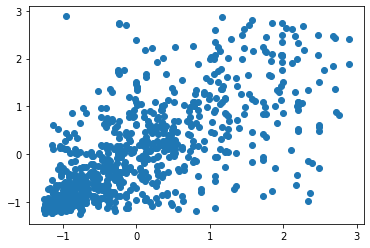

In [8]:
from sklearn.tree import DecisionTreeRegressor

X = data_df.drop(['Value'], axis=1)
# X = data_df[['visibility_miles_max_10']]
# X = data_df[['cos_monthly', 'cos_hourly','wind_speed_mph', 'visibility_miles_max_10']]
y = data_df['Value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

model = DecisionTreeRegressor(max_depth=500, random_state=1)
model.fit(X_train,y_train)
pred = model.predict(X_test)

print(mean_squared_error(y_test, pred))
print(model.score(X_test,y_test))
plt.scatter(pred, y_test)

In [9]:
# import keras
# from keras import metrics
# from keras import regularizers
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Activation
# from keras.layers import Conv2D, MaxPooling2D
# from keras.optimizers import Adam, RMSprop
# from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
# from keras.utils import plot_model
# from keras.models import load_model

In [10]:
# def norm_stats(df1, df2):
#     dfs = df1.append(df2)
#     minimum = np.min(dfs)
#     maximum = np.max(dfs)
#     mu = np.mean(dfs)
#     sigma = np.std(dfs)
#     return (minimum, maximum, mu, sigma)

# def z_score(col, stats):
#     m, M, mu, s = stats
#     df = pd.DataFrame()
#     for c in col.columns:
#         df[c] = (col[c]-mu[c])/s[c]
#     return df

In [11]:
# X = data_df.drop(['Year', 'Day', 'Value'], axis=1)
# # X = data_df[['visibility_miles_max_10']]
# # X = data_df[['cos_monthly', 'cos_hourly','wind_speed_mph', 'visibility_miles_max_10']]
# y = data_df['Value']
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# stats = norm_stats(X_train, X_test)
# X_train = np.array(z_score(X_train, stats))
# y_train = np.array(y_train)
# X_test = np.array(z_score(X_test, stats))
# y_test = np.array(y_test)

# print('Training shape:', X_train.shape)
# print('Training samples: ', X_train.shape[0])
# print('Validation samples: ', X_test.shape)
# print('Validation samples: ', y_test.shape)

In [12]:
# def basic_model_1(x_size, y_size):
#     t_model = Sequential()
#     t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
#     t_model.add(Dense(50, activation="relu"))
#     t_model.add(Dense(y_size))
#     print(t_model.summary())
#     t_model.compile(loss='mean_squared_error',
#         optimizer=Adam(),
#         metrics=[metrics.mae])
#     return(t_model)


In [13]:
# def basic_model_2(x_size, y_size):
#     t_model = Sequential()
#     t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
#     t_model.add(Dropout(0.1))
#     t_model.add(Dense(50, activation="relu"))
#     t_model.add(Dense(20, activation="relu"))
#     t_model.add(Dense(y_size))
#     print(t_model.summary())
#     t_model.compile(loss='mean_squared_error',
#         optimizer=Adam(),
#         metrics=[metrics.mae])
#     return(t_model)


In [14]:
# def basic_model_3(x_size, y_size):
#     t_model = Sequential()
#     t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
#     t_model.add(Dropout(0.2))
#     t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
#         kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
#     t_model.add(Dropout(0.1))
#     t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
#         kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
#     t_model.add(Dropout(0.1))
#     t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
#     t_model.add(Dropout(0.0))
#     t_model.add(Dense(y_size))
#     t_model.compile(
#         loss='mean_squared_error',
#         optimizer='nadam',
#         metrics=[metrics.mae])
#     return(t_model)

In [15]:



# model = basic_model_1(X_train.shape[1], y_train.shape[1])
# model.summary()

# epochs = 500
# batch_size = 128
# keras_callbacks = [
#     # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
#     # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
#     # TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
#     EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
# ]

# history = model.fit(X_train, y_train,
#     batch_size=batch_size,
#     epochs=epochs,
#     shuffle=True,
#     verbose=0, # Change it to 2, if wished to observe execution
#     validation_data=(X_test, y_test))

# train_score = model.evaluate(X_train, y_train, verbose=0)
# pred = model.predict(X_test)
# valid_score = model.evaluate(X_test, y_test, verbose=0)

# print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
# print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))



In [16]:
# print(mean_squared_error(y_test, pred))
# train_score
# plt.scatter(y_test,pred)

In [17]:
# def plot_hist(h, xsize=6, ysize=10):
#     # Prepare plotting
#     fig_size = plt.rcParams["figure.figsize"]
#     plt.rcParams["figure.figsize"] = [xsize, ysize]
#     fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
#     # summarize history for MAE
#     plt.subplot(211)
#     plt.plot(h['mean_absolute_error'])
#     plt.plot(h['val_mean_absolute_error'])
#     plt.title('Training vs Validation MAE')
#     plt.ylabel('MAE')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')
    
#     # summarize history for loss
#     plt.subplot(212)
#     plt.plot(h['loss'])
#     plt.plot(h['val_loss'])
#     plt.title('Training vs Validation Loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')
    
#     # Plot it all in IPython (non-interactive)
#     plt.draw()
#     plt.show()

#     return

# plot_hist(history.history, xsize=8, ysize=12)

In [18]:
# sns.lmplot(x = 'visibility_miles_max_10',y ='Value', data = data_df, line_kws={'color': 'red'}) 

In [19]:
# #building lin reg model using train and test data
# from sklearn.model_selection import train_test_split

# def feature_scaler(col): 
#     avg = np.mean(col)
#     std = np.std(col)
#     # for each x, subtract by the column mean and divide by the standard dev
#     scale = np.vectorize(lambda x: (x - avg) / std)
#     return scale(col)

# def cost_function(X,y,B):
#     m = X.shape[0]
#     J = np.sum((np.dot(X,B)-y)**2)/(2*m)
#     return J

# X = np.array(data_df[['x0','visibility_miles_max_10']])
# X[:,1] = feature_scaler(X[:,1])
# Y = data_df['Value']
# # print(X)



# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# X_train

# alpha = 0.01
# iter = 3000
# m = len(X_train)
# B = np.zeros(X_train.shape[1])
# for i in range(iter):
#     h = np.dot(X_train,B)
#     loss = h-y_train
#     der = np.dot(loss,X_train)/m
#     B = B- alpha*der
#     cost = cost_function(X_train,y_train,B)
#     print(f"Iteration : {iter}; Cost : {cost}")

# print(B)

# x = np.array(range(-2,3))

# # fig,a = plt.subplots(1,2)
# plt.plot(x,B[0] + B[1]*x,'r')
# plt.scatter(X_train[:,1],y_train)
# plt.show()

# # plt.subplots(1,2,2)
# pred = np.dot(X_test,B)
# # plt.scatter(pred,y_test)
# # plt.xlim(0,300)
# # plt.ylim(0,300)
# # plt.show()
# pred_df = pd.DataFrame()
# pred_df.insert(0,'pred',pred)
# pred_df.insert(1,'y_test',np.array(y_test))
# pred_df.head()
# sns.lmplot(x = 'y_test',y = 'pred',data = pred_df, line_kws={'color': 'red'}) 
# plt.xlim(0,250)
# plt.ylim(0,250)
# plt.show()

In [20]:
# from sklearn.model_selection import train_test_split

# X = np.array(data_df[['x0','wind_speed_mph']])
# Y = data_df['Value']
# X[:,1] = feature_scaler(X[:,1])
# # print(X)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# X_train

# alpha = 0.01
# iter = 10000
# m = len(X_train)
# B = np.zeros(X_train.shape[1])
# for i in range(iter):
#     h = np.dot(X_train,B)
#     loss = h-y_train
#     der = np.dot(loss,X_train)/m
#     B = B- alpha*der

# print(B)

# x = np.array(range(int(min(X_train[:,1])),int(max(X_train[:,1]))))

# plt.plot(x,B[0] + B[1]*x,'r')
# plt.scatter(X_train[:,1],y_train)
# plt.show()

# pred = np.dot(X_test,B)
# # plt.scatter(pred,y_test)
# # plt.xlim(0,300)
# # plt.ylim(0,300)
# # plt.show()
# y_test
# pred_df = pd.DataFrame()
# pred_df.insert(0,'pred',pred)
# pred_df.insert(1,'y_test',np.array(y_test))
# pred_df.head()
# sns.lmplot(x = 'y_test',y = 'pred',data = pred_df, line_kws={'color': 'red'}) 
# plt.xlim(0,150)
# plt.ylim(0,150)
# plt.show()

In [21]:
# from sklearn.model_selection import train_test_split

# X = np.array(data_df[['x0','pressure_mb']])
# Y = data_df['Value']
# X[:,1] = feature_scaler(X[:,1])

# # print(X)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# # print(X_train)
# # plt.scatter(X_train[:,1],y_train)

# alpha = 0.01
# iter = 30000
# m = len(X_train)
# B = np.zeros(X_train.shape[1])
# for i in range(iter):
#     h = np.dot(X_train,B)
#     loss = h-y_train
#     der = np.dot(loss,X_train)/m
#     B = B- alpha*der
# #     print(B)

# print(B)

# x = np.array( range( int( min(X_train[:,1])), int(max(X_train[:,1])) ))

# plt.plot(x,B[0] + B[1]*x,'r')
# plt.scatter(X_train[:,1],y_train)
# plt.show()


# pred = np.dot(X_test,B)
# # plt.scatter(pred,y_test)
# # plt.xlim(0,300)
# # plt.ylim(0,300)
# # plt.show()
# pred_df = pd.DataFrame()
# pred_df.insert(0,'pred',pred)
# pred_df.insert(1,'y_test',np.array(y_test))
# pred_df.head()
# sns.lmplot(x = 'y_test',y = 'pred',data = pred_df, line_kws={'color': 'red'}) 
# plt.xlim(0,200)
# plt.ylim(0,200)
# plt.show()

In [22]:
# from sklearn.model_selection import train_test_split

# def cost_function(X,y,B):
#     m = X.shape[0]
#     J = np.sum((np.dot(X,B)-y)**2)/(2*m)
#     return J

# X = np.array(data_df[['x0','wind_speed_mph','visibility_miles_max_10']])
# X[:,1] = feature_scaler(X[:,1])
# X[:,2] = feature_scaler(X[:,2])

# Y = np.array(data_df['Value'])
# # print(X)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# # print(X_train)
# # plt.scatter(X_train[:,1],y_train)

# alpha = 0.001
# iter = 30000
# m = len(X_train)
# B = np.zeros(X_train.shape[1])
# for i in range(iter):
#     h = np.dot(X_train,B)
#     loss = h-y_train
#     der = np.dot(loss,X_train)/m
#     B = B- alpha*der
#     cost = cost_function(X_train,y_train,B)
#     print(f"Iteration : {iter}; Cost : {cost}")
# #     print(B)

# print(B)

# pred = np.dot(X_test,B)
# # plt.scatter(pred,y_test)
# # plt.xlim(0,300)
# # plt.ylim(0,300)
# # plt.show()
# y_test
# pred_df = pd.DataFrame()
# pred_df.insert(0,'pred',pred)
# pred_df.insert(1,'y_test',np.array(y_test))
# pred_df.head()
# sns.lmplot(x = 'y_test',y = 'pred',data = pred_df, line_kws={'color': 'red'}) 
# plt.xlim(0,250)
# plt.ylim(0,250)
# plt.show()

In [23]:
# from sklearn.model_selection import train_test_split
# import math

# def transform_unit(unit, divisor):
#     def transform(unit):
#         return (2 * math.pi * (unit - .5) / divisor)
#     return math.sin(transform(unit)), math.cos(transform(unit))

# to_both = np.vectorize(lambda x: transform_unit(x, 12))

# X = np.array(data_df[['x0', 'Month', 'Month']])
# sin_month,cos_month = to_both(X[:,1])
# X[:,1] = sin_month
# X[:,2] = cos_month

# X_df = pd.DataFrame(X)
# print(X_df.describe())

# Y = data_df['Value']
# # print(X)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# # print(X_train)
# # plt.scatter(X_train[:,1],y_train)
# alpha = 0.01
# iter = 3000
# m = len(X_train)
# B = np.zeros(X_train.shape[1])
# for i in range(iter):
#     h = np.dot(X_train,B)
#     loss = h-y_train
#     der = np.dot(loss,X_train)/m
#     B = B- alpha*der
#     cost = cost_function(X_train,y_train,B)
#     print(f"Iteration : {iter}; Cost : {cost}")
# #     print(B)

# print(B)

# x = np.array( range( int( min(X_train[:,1])), int(max(X_train[:,1])) ))
# plt.plot(x,B[0] + B[1]*x,'r')
# plt.scatter(X_train[:,2],y_train)
# plt.show()

# pred = np.dot(X_test,B)
# # plt.scatter(pred,y_test)
# # plt.xlim(0,300)
# # plt.ylim(0,300)
# # plt.show()
# y_test
# pred_df = pd.DataFrame()
# pred_df.insert(0,'pred',pred)
# pred_df.insert(1,'y_test',np.array(y_test))
# pred_df.head()
# sns.lmplot(x = 'y_test',y = 'pred',data = pred_df, line_kws={'color': 'red'}) 
# plt.xlim(0,250)
# plt.ylim(0,250)
# plt.show()

In [24]:
# X = np.array(data_df[['x0', 'Month', 'Month']])
# # Jan = np.array(data_df.loc[data_df['Month']==1])
# # print(len(Jan))
# Jan = np.array(data_df.loc[data_df['Month']==1])
# print(len(Jan))
# Feb = np.array(data_df.loc[data_df['Month']==2])
# print(len(Feb))
# Mar = np.array(data_df.loc[data_df['Month']==3])
# print(len(Mar))
# Apr = np.array(data_df.loc[data_df['Month']==4])
# print(len(Apr))
# May = np.array(data_df.loc[data_df['Month']==5])
# print(len(May))
# Jun = np.array(data_df.loc[data_df['Month']==6])
# print(len(Jun))
# Jul = np.array(data_df.loc[data_df['Month']==7])
# print(len(Jul))
# Aug = np.array(data_df.loc[data_df['Month']==8])
# print(len(Aug))
# Sep = np.array(data_df.loc[data_df['Month']==9])
# print(len(Sep))
# Oct = np.array(data_df.loc[data_df['Month']==10])
# print(len(Oct))
# Nov = np.array(data_df.loc[data_df['Month']==11])
# print(len(Nov))
# Dec = np.array(data_df.loc[data_df['Month']==12])
# print(len(Dec))
# # Jan = np.array(data_df.loc[data_df['Month']==1])
# # print(len(Jan))
# # Jan = np.array(data_df.loc[data_df['Month']==1])
# # print(len(Jan))

In [25]:
# from sklearn import metrics

# def print_evaluate(true, predicted):  
#     mae = metrics.mean_absolute_error(true, predicted)
#     mse = metrics.mean_squared_error(true, predicted)
#     rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
#     r2_square = metrics.r2_score(true, predicted)
#     true, predicted = np.array(true), np.array(predicted)
#     mape = np.mean(np.abs((true - predicted) / true)) * 100
#     print('mean_absolute_error:', mae)
#     print('mean_squared_error:', mse)
#     print('root_mean_squared_error:', rmse)
#     print('R2 Square', r2_square)
#     print("Mean absolute percent error: ",mape)

# print_evaluate(y_test, pred)